In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
'''Open csv file function and conversion dbm/mW:'''
def read_csv(fname,a):
    storage = np.zeros((a,12))
    with open('DataChipClassica/' + fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for i, row in enumerate(csv_reader):
            if i > 2:
                for j in range(12):
                    storage[i-3, j] = float(row[5 + 2*j] + '.' + row[5 + 2*j + 1])
            line_count += 1
           
    return storage

dbm = lambda mw : 10*np.log10(mw)
mw = lambda dbm1 : 10**(dbm1*0.1)

In [3]:
'''Open csv:'''
input1 = read_csv('inputCH1.CSV', 109)
input2 = read_csv('inputCH2.CSV', 109)
input3 = read_csv('inputCH3.CSV', 109)
input4 = read_csv('inputCH4.CSV', 109)
reference = read_csv('reference.CSV', 105)

In [4]:
'''Average intensity computation:'''
avg_in1 = np.mean(input1, axis=0)[2:10]
avg_in2 = np.mean(input2, axis=0)[2:10]
avg_in3 = np.mean(input3, axis=0)[2:10]
avg_in4 = np.mean(input4, axis=0)[2:10]
avg_ref = np.mean(reference, axis=0)[11]

In [5]:
'''Conversion from dbm to mW:'''
avg_ref_mw = mw(avg_ref)
avg_in1_mw = mw(avg_in1)
avg_in2_mw = mw(avg_in2)
avg_in3_mw = mw(avg_in3)
avg_in4_mw = mw(avg_in4)

In [6]:
'''Intensity matrix conversion:'''
input_output_norm1 = np.around(np.concatenate((avg_in1_mw, avg_in2_mw, avg_in3_mw, avg_in4_mw)).reshape(4,8) / avg_ref_mw, 6)
input_output_norm2 = np.around(np.concatenate((avg_in1_mw / np.sum(avg_in1_mw), avg_in2_mw / np.sum(avg_in2_mw), avg_in3_mw /np.sum(avg_in3_mw), avg_in4_mw / np.sum(avg_in4_mw))).reshape(4,8), 6)

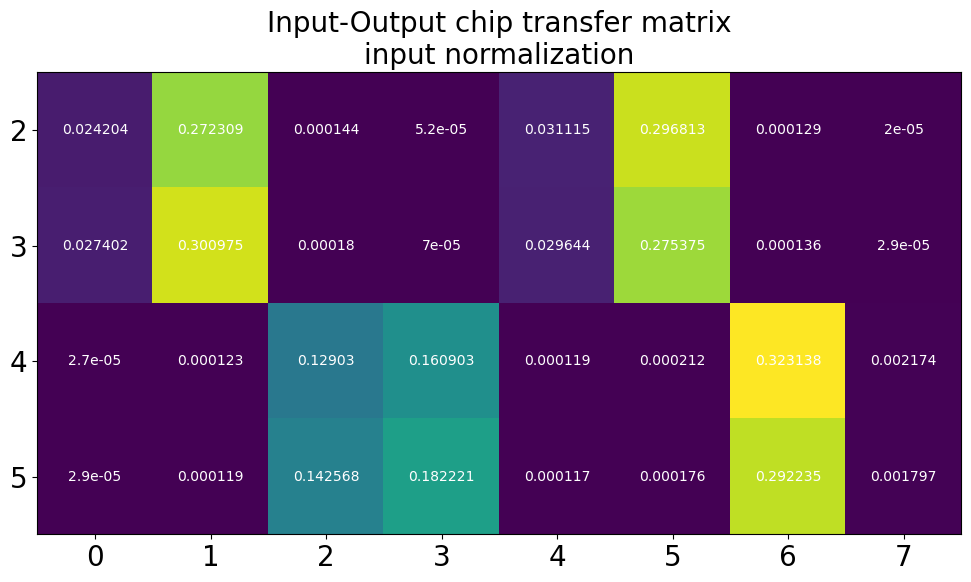

In [7]:
'''Display first intensity matrix:'''
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Input-Output chip transfer matrix\ninput normalization', fontsize=20)
ax.imshow(input_output_norm1, cmap='viridis')
ax.set_xticks(np.arange(8), np.arange(0,8), fontsize=20)
ax.set_yticks(np.arange(4), np.arange(2,6), fontsize=20)
# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(8):
        text = ax.text(j, i, input_output_norm1[i, j],
                       ha="center", va="center", color="w")
fig.savefig('grafici/Chip_Transfer_Matrix-Input_Norm.pdf', dpi=150)    

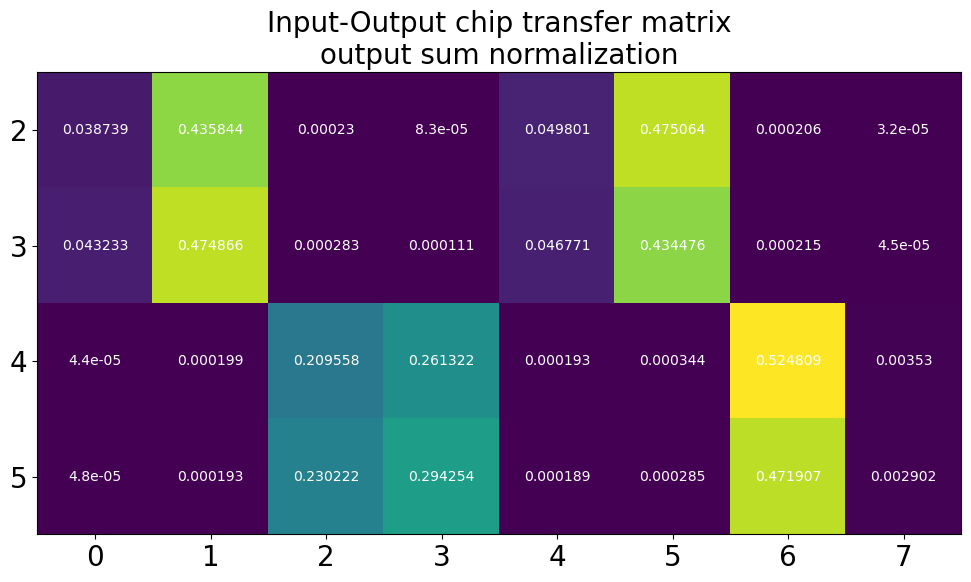

In [8]:
'''Display second intensity matrix:'''
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Input-Output chip transfer matrix\noutput sum normalization', fontsize=20)
ax.imshow(input_output_norm2, cmap='viridis')
ax.set_xticks(np.arange(8), np.arange(0,8), fontsize=20)
ax.set_yticks(np.arange(4), np.arange(2,6), fontsize=20)
# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(8):
        text = ax.text(j, i, input_output_norm2[i, j],
                       ha="center", va="center", color="w")
fig.savefig('grafici/Chip_Transfer_Matrix-Sum_Norm.pdf', dpi=150)    